<a href="https://colab.research.google.com/github/Caroline-Teixeira/imersao_python_dados/blob/colab/imers%C3%A3o_python_desafio_aula_5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio - Prophet - NVIDIA - feriados USA

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# Baixar dados dos últimos 4 anos para uma ação específica
dados = yf.download("NVDA", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741238,23753600
1,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785030,20538400
2,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031555,26263600
3,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746223,31485600
4,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858276,27710800
...,...,...,...,...,...,...,...
1001,2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
1002,2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
1003,2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800
1004,2023-12-28,496.429993,498.839996,494.119995,495.220001,495.196777,24658700


Treino

In [ ]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


In [ ]:
# Criar e treinar o modelo  # fit = aprenda
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprpxrr8ih/x_u5tzpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpxrr8ih/729tvego.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79325', 'data', 'file=/tmp/tmprpxrr8ih/x_u5tzpo.json', 'init=/tmp/tmprpxrr8ih/729tvego.json', 'output', 'file=/tmp/tmprpxrr8ih/prophet_modelwq304uwb/prophet_model-20240329170445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

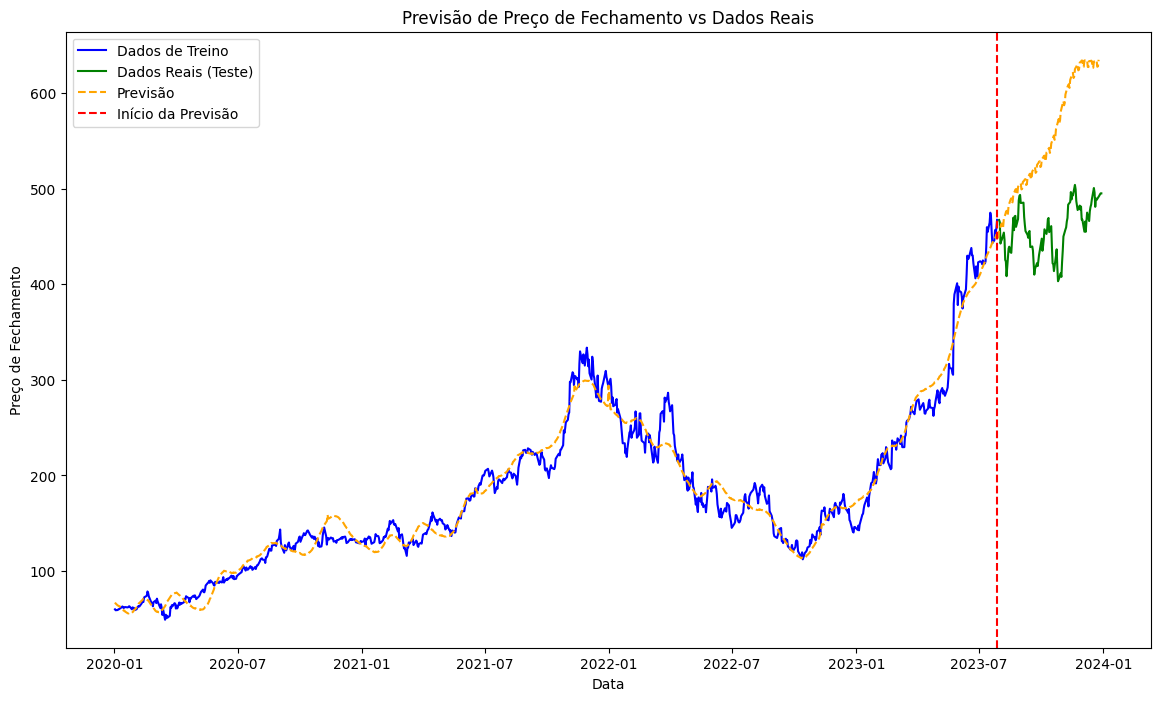

In [ ]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()